<a href="https://colab.research.google.com/github/SIDDH4RTH245/data-science-daily-journey/blob/main/netflix-data-cleaning/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
df = pd.read_csv("netflix_titles.csv")

print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)


Dataset Shape: (8807, 12)

Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

missing_df


,Missing Values,Percentage (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [7]:
# Fill categorical columns with 'Unknown'
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

# Replace missing rating with most frequent rating
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

# Drop rows where date_added is missing
df = df.dropna(subset=["date_added"])

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [8]:
print("Duplicate rows before cleaning:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicate rows after cleaning:", df.duplicated().sum())


Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0


In [9]:
# Convert date_added to datetime
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract new features
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

df.head()


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
# Remove extra spaces
df["type"] = df["type"].str.strip()
df["country"] = df["country"].str.strip()
df["rating"] = df["rating"].str.strip()

print("Text columns standardized.")


Text columns standardized.


In [11]:
print("Content Type Distribution:")
print(df["type"].value_counts())

print("\nTop 10 Countries:")
print(df["country"].value_counts().head(10))

print("\nTop 10 Ratings:")
print(df["rating"].value_counts().head(10))


Content Type Distribution:
type
Movie      6131
TV Show    2666
Name: count, dtype: int64

Top 10 Countries:
country
United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Top 10 Ratings:
rating
TV-MA    3209
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: 'images/movies_vs_tvshows.png'

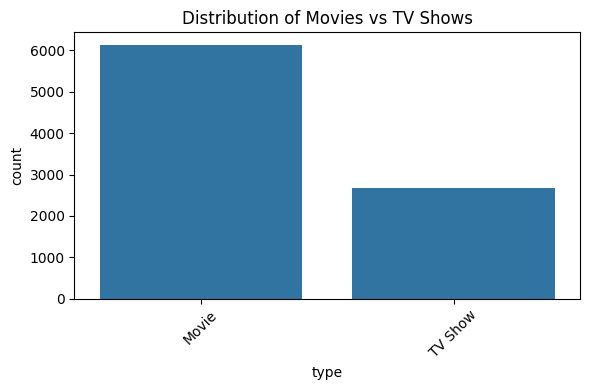

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("images/movies_vs_tvshows.png")
plt.show()


In [13]:
df.to_csv("cleaned_netflix.csv", index=False)

print("Cleaned dataset saved as cleaned_netflix.csv")


Cleaned dataset saved as cleaned_netflix.csv
